## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("eshopclothing.csv",delimiter=';')

In [2]:
data.head()

year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1

In [3]:
data.shape

(165474, 14)

In [4]:
data["location"].value_counts()

1    34532
2    33383
5    27783
4    27377
3    21656
6    20743
Name: location, dtype: int64

In [5]:
from pandas_profiling import ProfileReport
profile=ProfileReport(data,title="pandas_profiling Report")

In [6]:
profile

In [5]:
data["order"].value_counts()

1      24026
2      18984
3      15664
4      13044
5      11007
       ...  
187        2
190        2
195        1
193        1
194        1
Name: order, Length: 195, dtype: int64

Mostly all features are catogories 

In [6]:
##all data belongs to year 2008 so better to drop
data=data.drop("year",axis=1)

In [7]:
data.columns

Index(['month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [8]:
data.isnull().sum()

month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

## no null values in this data

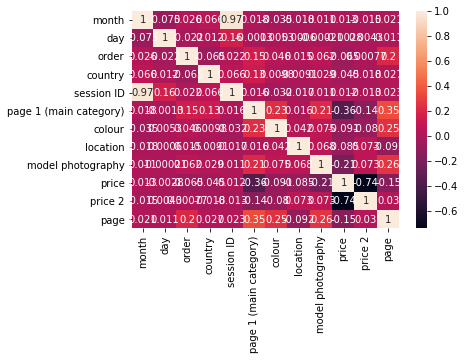

In [9]:
import seaborn as sns
ax = sns.heatmap(data.corr(), annot=True)

In [10]:
data.corr()

month       day     order   country  session ID  \
month                   1.000000 -0.075098  0.026093  0.065502    0.970961   
day                    -0.075098  1.000000 -0.021744  0.011551    0.161369   
order                   0.026093 -0.021744  1.000000 -0.064709    0.021829   
country                 0.065502  0.011551 -0.064709  1.000000    0.065869   
session ID              0.970961  0.161369  0.021829  0.065869    1.000000   
page 1 (main category)  0.017557 -0.001251  0.151693  0.132817    0.016123   
colour                 -0.035279  0.005313  0.046427  0.009789   -0.032034   
location               -0.017712  0.000596  0.014854 -0.009072   -0.016721   
model photography       0.011102 -0.000211  0.061820  0.028725    0.010585   
price                   0.012700 -0.002818 -0.064779 -0.045345    0.011669   
price 2                -0.014658  0.004254  0.000772 -0.017536   -0.012742   
page                    0.020898  0.011125  0.204106  0.026695    0.023254   

                        page 1 (main category)    colour  location  \
month                                 0.017557 -0.035279 -0.017712   
day                                  -0.001251  0.005313  0.000596   
order                                 0.151693  0.046427  0.014854   
country                               0.132817  0.009789 -0.009072   
session ID                            0.016123 -0.032034 -0.016721   
page 1 (main category)                1.000000  0.230577  0.015939   
colour                                0.230577  1.000000  0.042062   
location                              0.015939  0.042062  1.000000   
model photography                     0.213113  0.074755  0.067678   
price                                -0.364791 -0.091159 -0.084653   
price 2                              -0.137944 -0.080147  0.073187   
page                                  0.347992  0.249322 -0.091865   

                        model photography     price   price 2      page  
month                            0.011102  0.012700 -0.014658  0.020898  
day                             -0.000211 -0.002818  0.004254  0.011125  
order                            0.061820 -0.064779  0.000772  0.204106  
country                          0.028725 -0.045345 -0.017536  0.026695  
session ID                       0.010585  0.011669 -0.012742  0.023254  
page 1 (main category)           0.213113 -0.364791 -0.137944  0.347992  
colour                           0.074755 -0.091159 -0.080147  0.249322  
location                         0.067678 -0.084653  0.073187 -0.091865  
model photography                1.000000 -0.212395  0.072944  0.258315  
price                           -0.212395  1.000000 -0.743633 -0.150455  
price 2                          0.072944 -0.743633  1.000000  0.029984  
page                             0.258315 -0.150455  0.029984  1.000000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   month                    165474 non-null  int64 
 1   day                      165474 non-null  int64 
 2   order                    165474 non-null  int64 
 3   country                  165474 non-null  int64 
 4   session ID               165474 non-null  int64 
 5   page 1 (main category)   165474 non-null  int64 
 6   page 2 (clothing model)  165474 non-null  object
 7   colour                   165474 non-null  int64 
 8   location                 165474 non-null  int64 
 9   model photography        165474 non-null  int64 
 10  price                    165474 non-null  int64 
 11  price 2                  165474 non-null  int64 
 12  page                     165474 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 16.4+ MB


In [12]:
data.describe()

month            day          order        country  \
count  165474.000000  165474.000000  165474.000000  165474.000000   
mean        5.585887      14.524554       9.817476      26.952621   
std         1.328160       8.830374      13.478411       7.150691   
min         4.000000       1.000000       1.000000       1.000000   
25%         4.000000       7.000000       2.000000      29.000000   
50%         5.000000      14.000000       6.000000      29.000000   
75%         7.000000      22.000000      12.000000      29.000000   
max         8.000000      31.000000     195.000000      47.000000   

          session ID  page 1 (main category)         colour       location  \
count  165474.000000           165474.000000  165474.000000  165474.000000   
mean    12058.417056                2.400842       6.227655       3.258198   
std      7008.418903                1.144420       4.235606       1.713206   
min         1.000000                1.000000       1.000000       1.000000   
25%      5931.000000                1.000000       3.000000       2.000000   
50%     11967.500000                2.000000       4.000000       3.000000   
75%     18219.000000                3.000000       9.000000       5.000000   
max     24026.000000                4.000000      14.000000       6.000000   

       model photography          price        price 2           page  
count      165474.000000  165474.000000  165474.000000  165474.000000  
mean            1.260071      43.802507       1.488167       1.710166  
std             0.438674      12.548131       0.499861       0.982412  
min             1.000000      18.000000       1.000000       1.000000  
25%             1.000000      33.000000       1.000000       1.000000  
50%             1.000000      43.000000       1.000000       1.000000  
75%             2.000000      52.000000       2.000000       2.000000  
max             2.000000      82.000000       2.000000       5.000000

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   month                    165474 non-null  int64 
 1   day                      165474 non-null  int64 
 2   order                    165474 non-null  int64 
 3   country                  165474 non-null  int64 
 4   session ID               165474 non-null  int64 
 5   page 1 (main category)   165474 non-null  int64 
 6   page 2 (clothing model)  165474 non-null  object
 7   colour                   165474 non-null  int64 
 8   location                 165474 non-null  int64 
 9   model photography        165474 non-null  int64 
 10  price                    165474 non-null  int64 
 11  price 2                  165474 non-null  int64 
 12  page                     165474 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 16.4+ MB


In [14]:
data.columns

Index(['month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [15]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['page 2 (clothing model)']= label_encoder.fit_transform(data['page 2 (clothing model)']) 
  
data['page 2 (clothing model)'].value_counts() 

70     3579
11     3013
2      2789
135    2681
44     2566
       ... 
197      46
211       2
149       2
155       1
184       1
Name: page 2 (clothing model), Length: 217, dtype: int64

In [16]:
data.head()

month  day  order  country  session ID  page 1 (main category)  \
0      4    1      1       29           1                       1   
1      4    1      2       29           1                       1   
2      4    1      3       29           1                       2   
3      4    1      4       29           1                       2   
4      4    1      5       29           1                       2   

   page 2 (clothing model)  colour  location  model photography  price  \
0                        4       1         5                  1     28   
1                        7       1         6                  1     33   
2                       70      10         2                  1     52   
3                       51       6         6                  2     38   
4                       74       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1

In [17]:
data = data.drop_duplicates()

In [18]:
data["location"].value_counts()

1    34532
2    33383
5    27783
4    27377
3    21656
6    20743
Name: location, dtype: int64

In [19]:
Data=data.groupby("location")

In [20]:
Data.head()

month  day  order  country  session ID  page 1 (main category)  \
0       4    1      1       29           1                       1   
1       4    1      2       29           1                       1   
2       4    1      3       29           1                       2   
3       4    1      4       29           1                       2   
4       4    1      5       29           1                       2   
5       4    1      6       29           1                       3   
6       4    1      7       29           1                       3   
7       4    1      8       29           1                       4   
8       4    1      9       29           1                       4   
9       4    1      1       29           2                       2   
10      4    1      2       29           2                       2   
11      4    1      3       29           2                       2   
12      4    1      4       29           2                       2   
13      4    1      5       29           2                       1   
14      4    1      6       29           2                       1   
15      4    1      7       29           2                       2   
16      4    1      8       29           2                       4   
17      4    1      9       29           2                       4   
18      4    1     10       29           2                       4   
19      4    1      1       21           3                       2   
20      4    1      2       21           3                       3   
21      4    1      3       21           3                       3   
22      4    1      4       21           3                       3   
23      4    1      5       21           3                       3   
24      4    1      6       21           3                       4   
26      4    1      2       21           4                       1   
27      4    1      3       21           4                       3   
28      4    1      4       21           4                       3   
31      4    1      2        9           6                       3   
35      4    1      1       29           7                       1   

    page 2 (clothing model)  colour  location  model photography  price  \
0                         4       1         5                  1     28   
1                         7       1         6                  1     33   
2                        70      10         2                  1     52   
3                        51       6         6                  2     38   
4                        74       4         3                  2     52   
5                       127       6         1                  2     57   
6                       128       5         1                  2     33   
7                       198       9         5                  1     38   
8                       215       6         4                  2     48   
9                        66       9         5                  1     57   
10                       55      12         1                  1     67   
11                       58      11         2                  1     57   
12                       61       2         3                  1     57   
13                        1       3         4                  1     38   
14                        1       3         4                  1     38   
15                       61       2         3                  1     57   
16                      135       3         1                  1     38   
17                      162       9         6                  2     48   
18                      161       9         5                  1     43   
19                       51       6         6                  2     38   
20                      109       4         2                  1     48   
21                      132      13         3                  1     48   
22                       77       9         4                  2     28   
23                       84      

## Outliers Detection and Removal

In [21]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.74)
IQR=Q3-Q1
print(IQR)

month                          3.0
day                           15.0
order                          9.0
country                        0.0
session ID                 12050.0
page 1 (main category)         2.0
page 2 (clothing model)       91.0
colour                         6.0
location                       3.0
model photography              1.0
price                         19.0
price 2                        1.0
page                           1.0
dtype: float64


In [22]:
((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()

month                          0
day                            0
order                      14282
country                    31511
session ID                     0
page 1 (main category)         0
page 2 (clothing model)        0
colour                         0
location                       0
model photography              0
price                       1923
price 2                        0
page                       11684
dtype: int64

In [23]:
df=data[-((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [24]:
df.shape

(113563, 13)

## Scaling the Data 

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(df)

## PCA

In [51]:
from sklearn.decomposition import PCA
pc = PCA(svd_solver='auto')
pc.fit(data_scaled)
print('Total no. of principal components =',pc.n_components_)

Total no. of principal components = 13


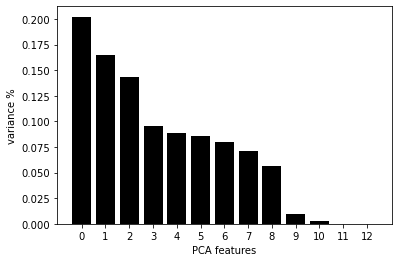

In [62]:
# Plot the explained variances
import matplotlib.pyplot as plt
features = range(pc.n_components_)
plt.bar(features, pc.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(pc.components_)

Text(0, 0.5, 'PCA 2')

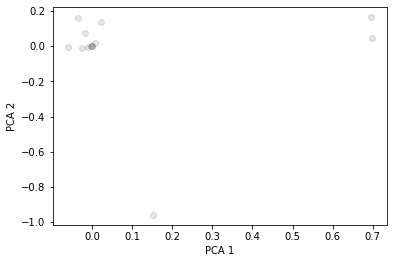

In [63]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [69]:
#Cumulative Variance explained by each PC
import numpy as np
cum_var = np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
print(list(cum_var))

[20.21, 36.67, 51.0, 60.54, 69.41, 77.95, 85.98, 93.11, 98.74, 99.67999999999999, 99.99, 100.0, 100.0]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

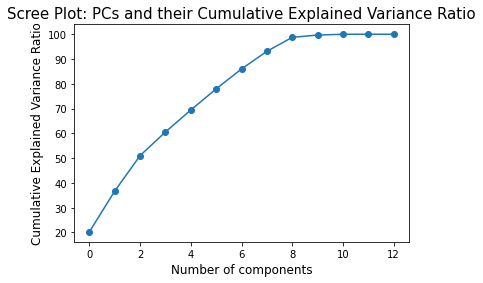

In [70]:
# Scree Plot
plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

# K-Means

In [26]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init=5 )
    clusters.fit( data_scaled )
    cluster_errors.append( clusters.inertia_ )
optimal_clusters = np.argmin(cluster_errors)+2

In [27]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

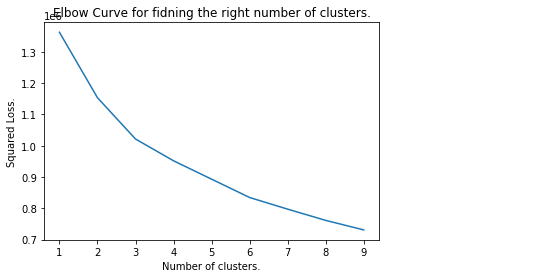

The optimal number of clusters obtained is -  10
The loss for optimal cluster is -  730646.5315417974


In [29]:
import matplotlib.pyplot as plt
plt.plot(cluster_range, cluster_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(cluster_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(cluster_errors))

In [30]:
model = KMeans(n_clusters =optimal_clusters )
model.fit(data_scaled)

KMeans(n_clusters=10)

In [36]:
df.loc[:, 'cluster_label'] = model.labels_
df.head(5)

month  day  order  country  session ID  page 1 (main category)  \
0      4    1      1       29           1                       1   
1      4    1      2       29           1                       1   
2      4    1      3       29           1                       2   
3      4    1      4       29           1                       2   
4      4    1      5       29           1                       2   

   page 2 (clothing model)  colour  location  model photography  price  \
0                        4       1         5                  1     28   
1                        7       1         6                  1     33   
2                       70      10         2                  1     52   
3                       51       6         6                  2     38   
4                       74       4         3                  2     52   

   price 2  page  cluster_label  
0        2     1              8  
1        2     1              8  
2        1     1              0  
3        2     1              2  
4        1     1              6

In [38]:
label=df.groupby(['cluster_label'])["location"].count()
label

cluster_label
0    12459
1     7252
2     8739
3     9123
4    11638
5    15445
6     8609
7    14997
8    14851
9    10450
Name: location, dtype: int64

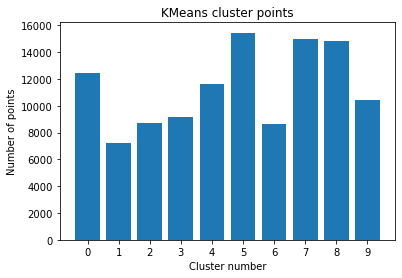

In [39]:
plt.bar([x for x in range(optimal_clusters)],label)
plt.xticks(list(range(0,10)))
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [40]:
from sklearn import metrics
metrics.silhouette_score(data_scaled, model.labels_)

0.15718374749600744

In [41]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
davies_bouldin_score(data_scaled,model.labels_)

1.8457781411464151

In [42]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
sse,db,slc = {}, {}, {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=10,random_state=12345).fit(data_scaled)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(data_scaled,clusters)
    slc[k] = silhouette_score(data_scaled,clusters)

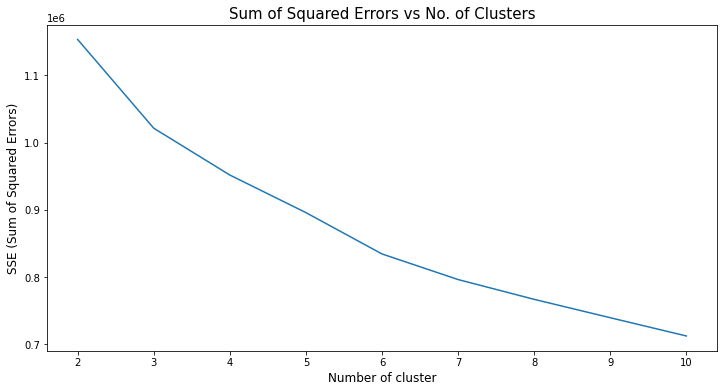

In [43]:
#Plotting SSE
plt.figure(figsize=(12,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("Sum of Squared Errors vs No. of Clusters", fontsize=15)
plt.show()

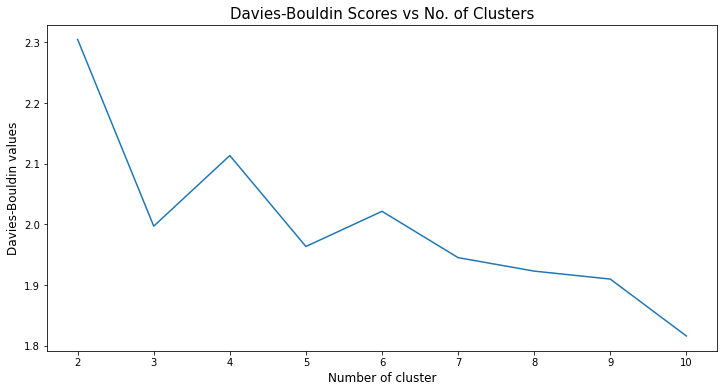

In [44]:
#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

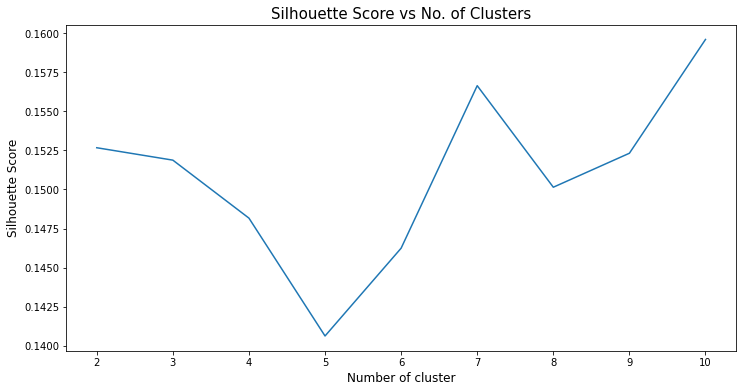

In [45]:
plt.figure(figsize=(12,6))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs No. of Clusters", fontsize=15)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.15266867047318292
For n_clusters = 3 The average silhouette_score is : 0.15187186753904758
For n_clusters = 4 The average silhouette_score is : 0.14818776743289033
For n_clusters = 5 The average silhouette_score is : 0.14085739642331674
For n_clusters = 6 The average silhouette_score is : 0.14625721837572198
For n_clusters = 7 The average silhouette_score is : 0.15965043936304416
For n_clusters = 8 The average silhouette_score is : 0.1510703839311864
For n_clusters = 9 The average silhouette_score is : 0.15374391564251058
For n_clusters = 10 The average silhouette_score is : 0.1535645760053867


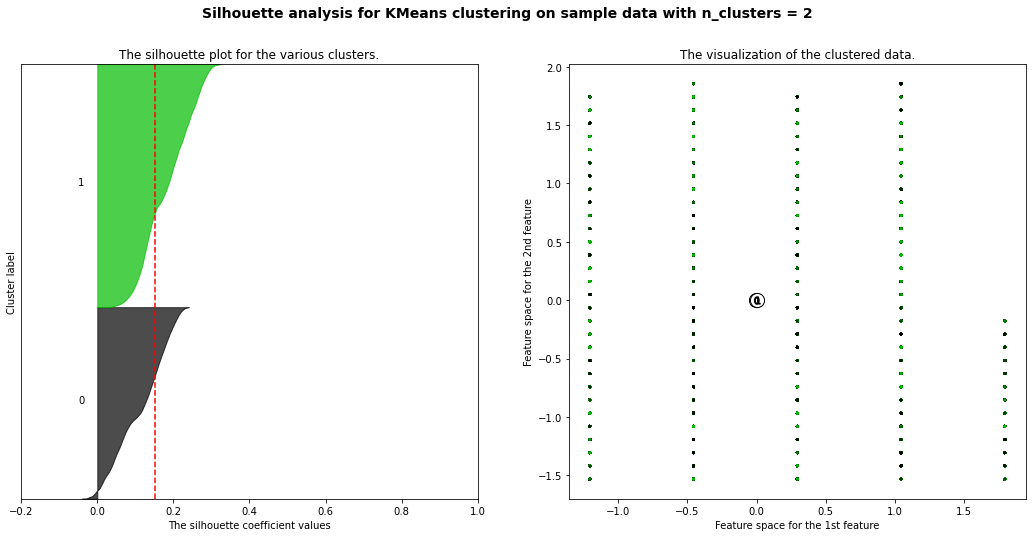

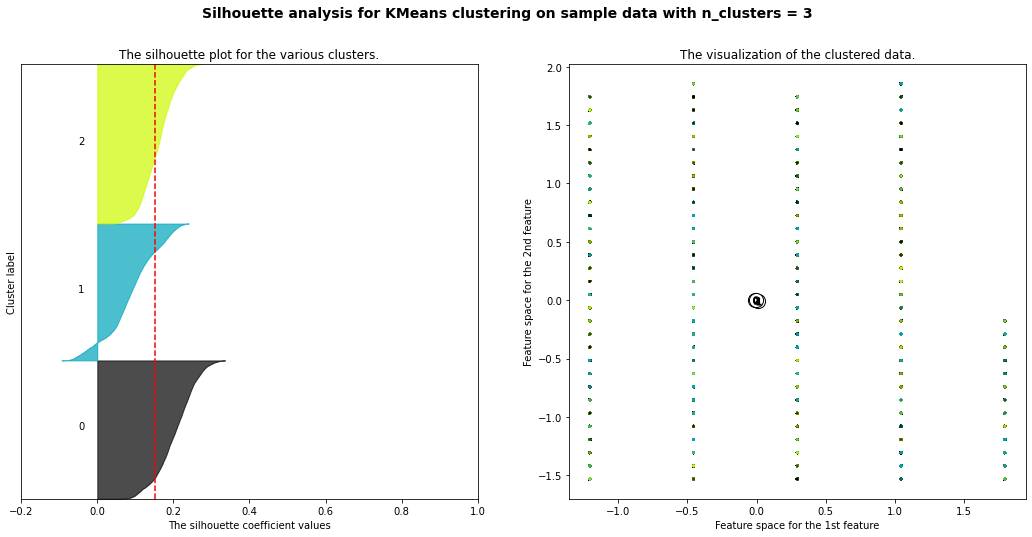

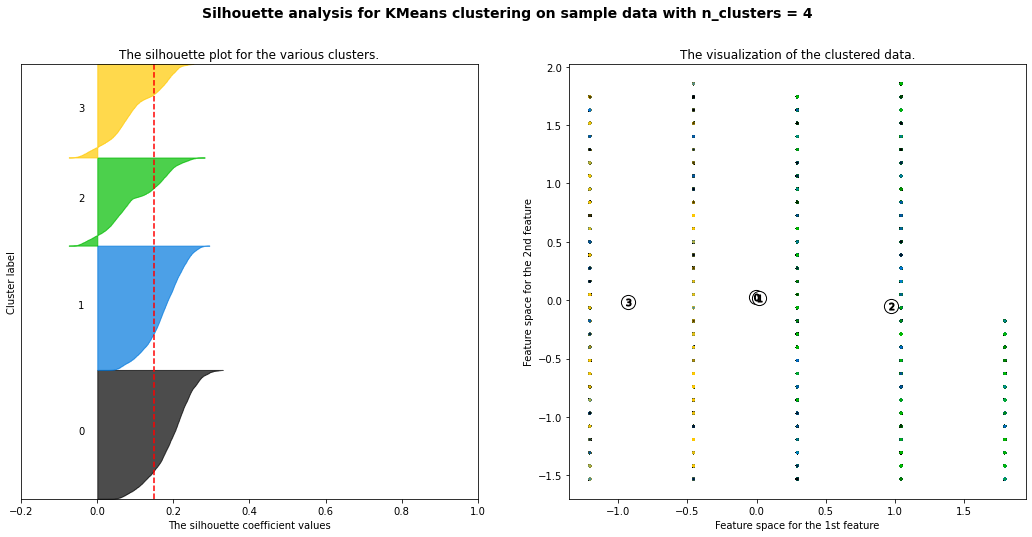

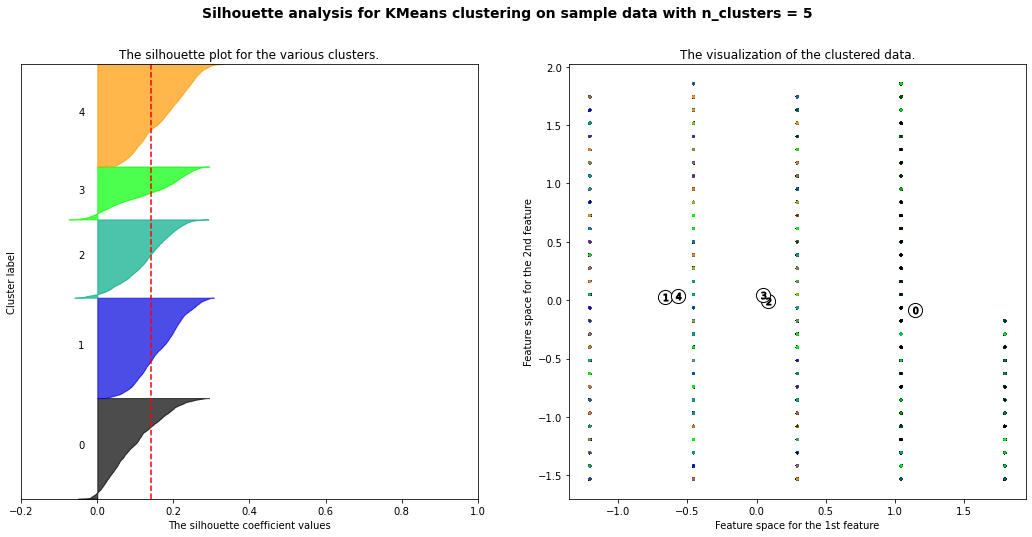

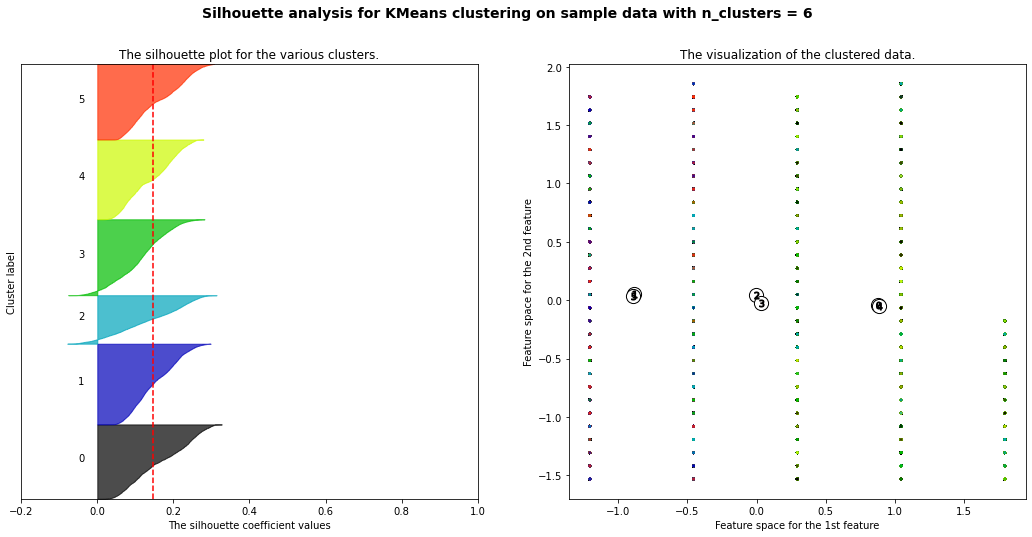

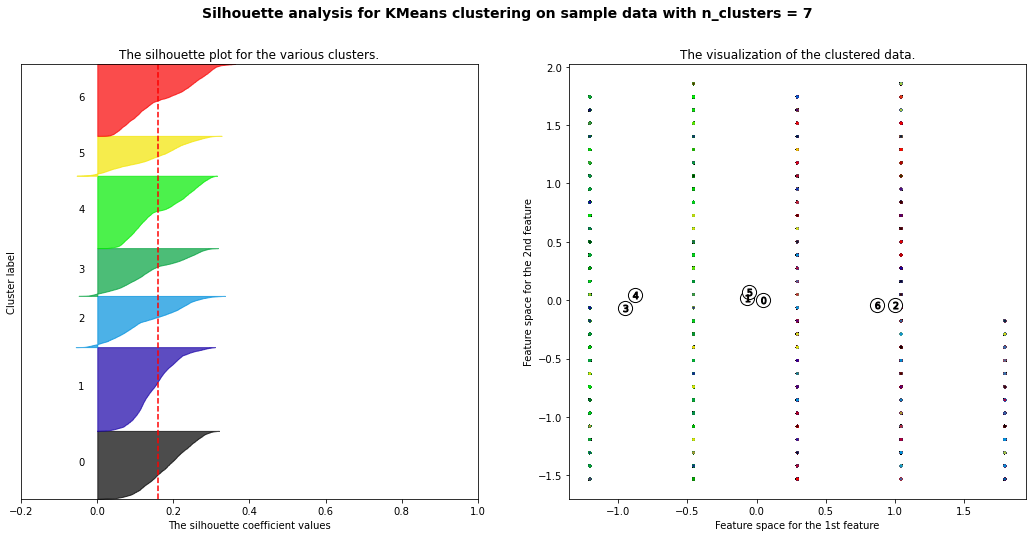

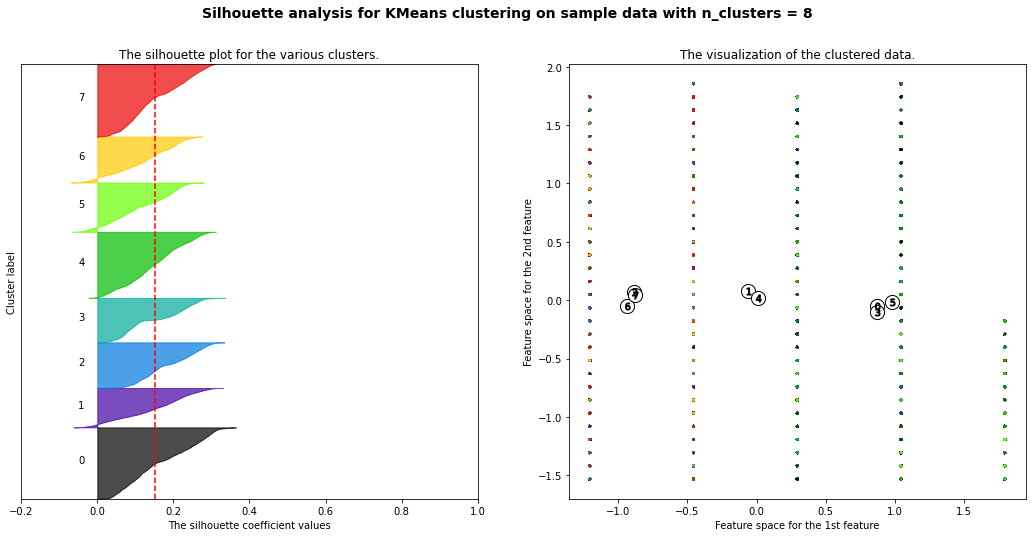

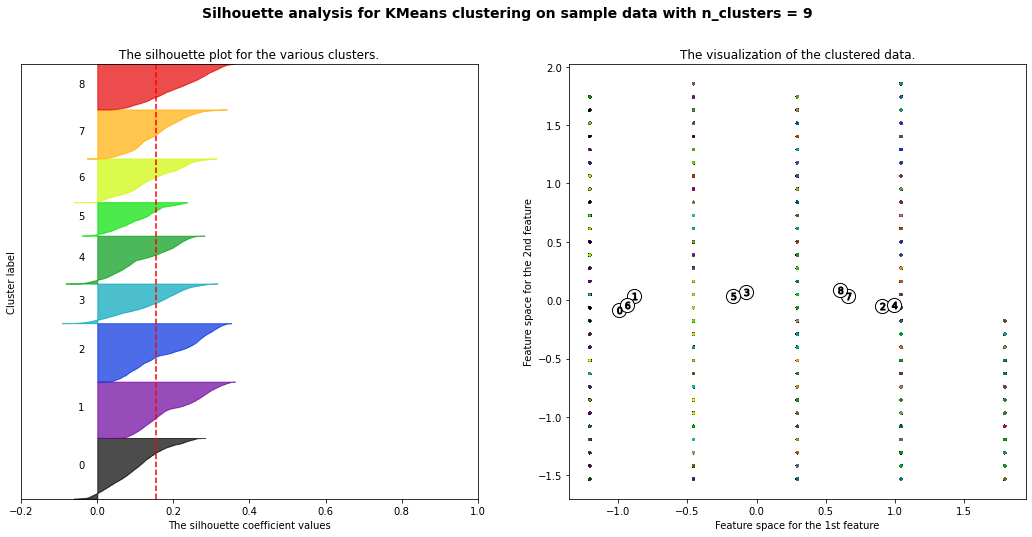

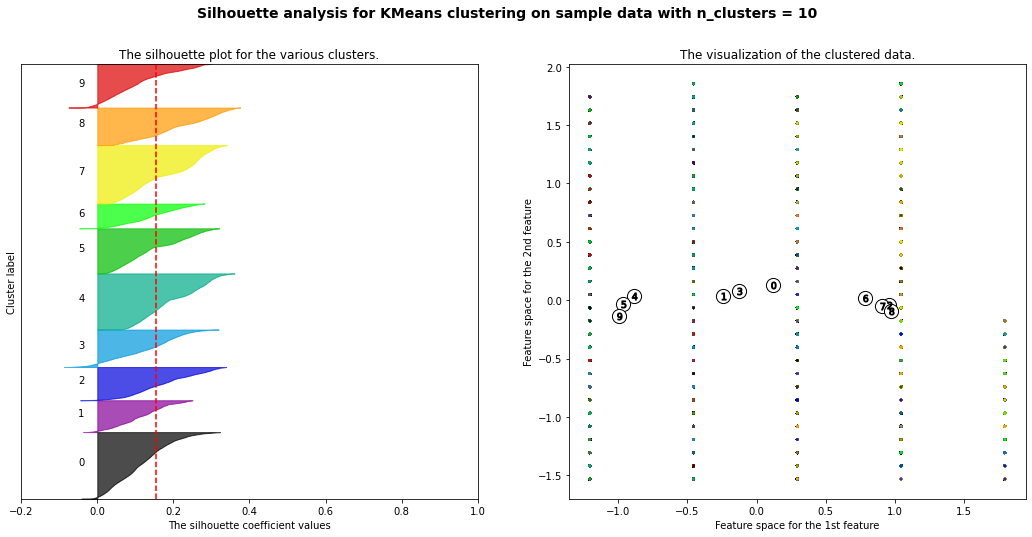

In [119]:
#Silhouette Plots for Different No. of Clusters
import matplotlib.cm as cm
import numpy as np
for n_clusters in range(0, 11):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but here the range is from -0.2 till 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator seed of 12345 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1, random_state=12345)
    cluster_labels = clusterer.fit_predict(data_scaled)
    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

In [120]:
cluster_labels = model.fit_predict(data_scaled)

In [121]:
preds = model.labels_
data_df = pd.DataFrame(df)
data_df['KM_Clusters'] = preds
data_df.head(10)

month  day  order  country  session ID  page 1 (main category)  \
0       4    1      1       29           1                       1   
1       4    1      2       29           1                       1   
2       4    1      3       29           1                       2   
3       4    1      4       29           1                       2   
4       4    1      5       29           1                       2   
9       4    1      1       29           2                       2   
10      4    1      2       29           2                       2   
11      4    1      3       29           2                       2   
12      4    1      4       29           2                       2   
13      4    1      5       29           2                       1   

    page 2 (clothing model)  colour  location  model photography  price  \
0                         4       1         5                  1     28   
1                         7       1         6                  1     33   
2                        70      10         2                  1     52   
3                        51       6         6                  2     38   
4                        74       4         3                  2     52   
9                        66       9         5                  1     57   
10                       55      12         1                  1     67   
11                       58      11         2                  1     57   
12                       61       2         3                  1     57   
13                        1       3         4                  1     38   

    price 2  page  cluster.label_  KM_Clusters  
0         2     1               5            0  
1         2     1               5            0  
2         1     1               9            1  
3         2     1               2            5  
4         1     1               4            1  
9         1     2               9            1  
10        1     2               9            1  
11        1     2               9            1  
12        1     2               6            4  
13        2     1               5            0

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=10).fit(data_scaled)
core_samples_mask = np.zeros_like(db.labels_)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#data['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [80]:
# number of labels
print("number of labels: ", set(labels))

number of labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

In [81]:
db.labels_

array([  0,   1,   2, ..., 897,  -1, 829], dtype=int64)

In [82]:
pd.Series(db.labels_).value_counts()

-1      26298
 2        776
 601      758
 9        751
 10       720
        ...  
 236        6
 221        5
 204        5
 758        5
 593        3
Length: 938, dtype: int64

In [71]:
# save the cluster labels and sort by cluster
datacopy = df.copy()
datacopy = datacopy.drop('cluster_label', axis=1)
datacopy['DB_cluster'] = db.labels_

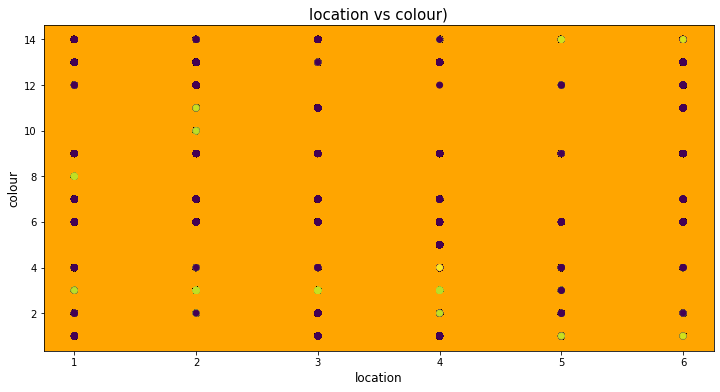

In [77]:
#Visualize clusters: Random Feature Pair-1 (income vs gdpp)
import matplotlib.pyplot as plt_3
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.figure(figsize=(12,6))
plt_3.scatter(datacopy['location'],datacopy['colour'],c=db.labels_) 
plt_3.title('location vs colour)', fontsize=15)
plt_3.xlabel("location", fontsize=12)
plt_3.ylabel("colour", fontsize=12)
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.show()

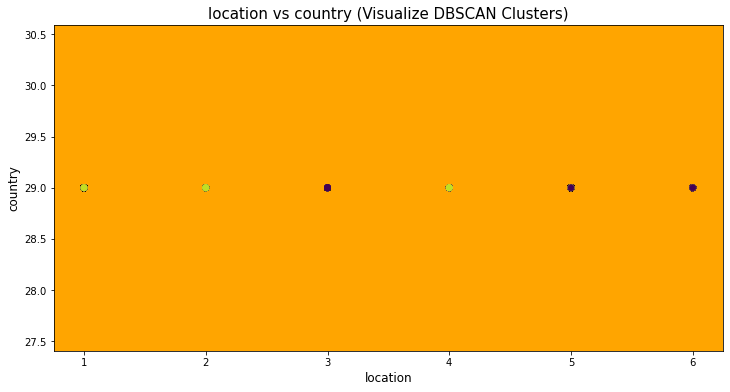

In [78]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
import matplotlib.pyplot as plt_3
plt_3.figure(figsize=(12,6))
plt_3.scatter(datacopy['location'],datacopy['country'],c=db.labels_) 
plt_3.title('location vs country (Visualize DBSCAN Clusters)', fontsize=15)
plt_3.xlabel("location", fontsize=12)
plt_3.ylabel("country", fontsize=12)
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.show()

In [75]:
datacopy.to_csv('DBSCAN_results.csv', index=False)

900 clusters are generated 

## Thank You